In [187]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score

In [5]:
binary_vectors = 'stock2vec_Keyed_Binary.bin'
text_vectors = 'stock2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [6]:
weights = model.wv.vectors
weights

<ipython-input-6-5a8ad5b79ee4>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  weights = model.wv.vectors


array([[-0.14497213, -0.45860606, -1.1782019 , -1.1941084 ],
       [ 0.7040044 , -1.1718557 , -0.2739038 ,  1.0556908 ],
       [-0.15832463, -0.7564409 , -1.0549943 , -0.7916976 ],
       ...,
       [ 0.5649781 ,  0.12315261, -0.9708491 ,  0.56072503],
       [ 0.628613  , -0.09328333, -0.77231306, -0.04612734],
       [ 0.605424  , -0.09975752, -0.82908016,  0.04775446]],
      dtype=float32)

In [90]:
esg = read_csv('../notebooks/content/esg.csv', )
esg.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'ESG-2016', 'ESG-2017',
       'ESG-2018', 'ESG-2019', 'ESG-2020', 'Average ESG', 'Risk Level',
       'ESG Rating', 'Symbol.1', 'Name.1', 'Unnamed: 24'],
      dtype='object')

In [91]:
columns = ['Symbol', 'Name', 'Sector', 'price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
#columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
#esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg.columns = columns
esg['vector1'] = 0.0
esg['vector2'] = 0.0
esg['vector3'] = 0.0
esg['vector4'] = 0.0
esg.dropna(inplace=True)
#target = esg.pop("esg_rating")
esg.shape

#target = esg.pop('esg_rating')

(461, 15)

In [92]:
esg.head()

,Symbol,Name,Sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,esg_rating,vector1,vector2,vector3,vector4
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,34.9,0.0,0.0,0.0,0.0
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,32.6,0.0,0.0,0.0,0.0
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,29.8,0.0,0.0,0.0,0.0
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,29.1,0.0,0.0,0.0,0.0
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,11.3,0.0,0.0,0.0,0.0


In [93]:
for symbol in esg['Symbol']:
    esg.loc[esg['Symbol']==symbol, 'vector1'] = word_dict[symbol][0]
    esg.loc[esg['Symbol']==symbol, 'vector2'] = word_dict[symbol][1]
    esg.loc[esg['Symbol']==symbol, 'vector3'] = word_dict[symbol][2]
    esg.loc[esg['Symbol']==symbol, 'vector4'] = word_dict[symbol][3]

In [75]:
esg.loc[esg['Symbol']=="MCO", 'vector1']

318   -0.144972
Name: vector1, dtype: float64

In [89]:
word_dict["AOS"]

array([-0.21396951, -0.43690982, -1.2728865 , -0.7848747 ], dtype=float32)

In [98]:
esg.head(10)

,Symbol,Name,Sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.490,1.387210e+11,0.304746,-1.149245,-0.353319,-2.837031
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,1.078342e+10,-0.213970,-0.436910,-1.272887,-0.784875
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,1.021210e+11,0.129664,-1.113122,-0.635674,-1.020973
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.050,1.813860e+11,0.180174,-1.167327,-0.749103,1.010242
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,9.876586e+10,0.228507,-0.474911,-0.782801,-2.162982
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,5.251867e+10,0.014122,-0.599688,-1.156785,0.962567
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.000,6.242378e+09,0.148667,0.135165,-1.412016,1.068616
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,9.455021e+10,-0.190856,-1.011912,-1.054680,-0.014732
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.810,8.123612e+09,0.927486,-0.071284,-0.530195,0.565569
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,1.119166e+10,0.586914,0.609465,-1.762861,4.479712


In [97]:
target = esg.pop("esg_rating")

0      34.9
1      32.6
2      29.8
3      29.1
4      11.3
       ... 
500    16.4
501    18.1
502    34.2
503    25.4
504    24.3
Name: esg_rating, Length: 461, dtype: float64

In [99]:
dataset = esg[['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', 
               '52_week_low', '52_week_high', 'market_cap','vector1', 'vector2', 'vector3', 'vector4' ]]

In [100]:
dataset.head()

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,0.304746,-1.149245,-0.353319,-2.837031
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,-0.213970,-0.436910,-1.272887,-0.784875
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,0.129664,-1.113122,-0.635674,-1.020973
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,0.180174,-1.167327,-0.749103,1.010242
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,0.228507,-0.474911,-0.782801,-2.162982


In [101]:
set_option('precision', 1)
print(dataset.describe())

        price  price_per_earnings  dividend_yield  earnings_per_share  \
count   461.0               461.0           461.0               461.0   
mean    101.7                25.4             1.9                 3.8   
std     106.9                42.8             1.4                 5.3   
min       2.8              -251.5             0.0               -24.6   
25%      47.4                15.5             0.8                 1.6   
50%      74.7                19.7             1.8                 2.9   
75%     118.4                25.9             2.8                 5.2   
max    1350.5               520.1             7.7                44.1   

       52_week_low  52_week_high  market_cap  vector1  vector2  vector3  \
count        461.0         461.0     4.6e+02    461.0    461.0    461.0   
mean         120.1          81.6     4.9e+10      0.6     -0.3     -0.7   
std          123.9          77.4     8.8e+10      0.9      1.0      1.0   
min            6.6           2.8     2.6e+

In [103]:
# correlation
set_option('precision', 4)
print(dataset.corr(method='pearson'))

                     price  price_per_earnings  dividend_yield  \
price               1.0000              0.2440         -0.2737   
price_per_earnings  0.2440              1.0000         -0.1892   
dividend_yield     -0.2737             -0.1892          1.0000   
earnings_per_share  0.5318             -0.0038         -0.0792   
52_week_low         0.9920              0.2315         -0.2752   
52_week_high        0.9762              0.1934         -0.2358   
market_cap          0.4082              0.1315         -0.0104   
vector1            -0.1703             -0.0464          0.4379   
vector2            -0.1853             -0.0110         -0.1473   
vector3            -0.0313             -0.0408          0.4496   
vector4            -0.0791              0.0860         -0.2565   

                    earnings_per_share  52_week_low  52_week_high  market_cap  \
price                           0.5318       0.9920        0.9762      0.4082   
price_per_earnings             -0.0038       

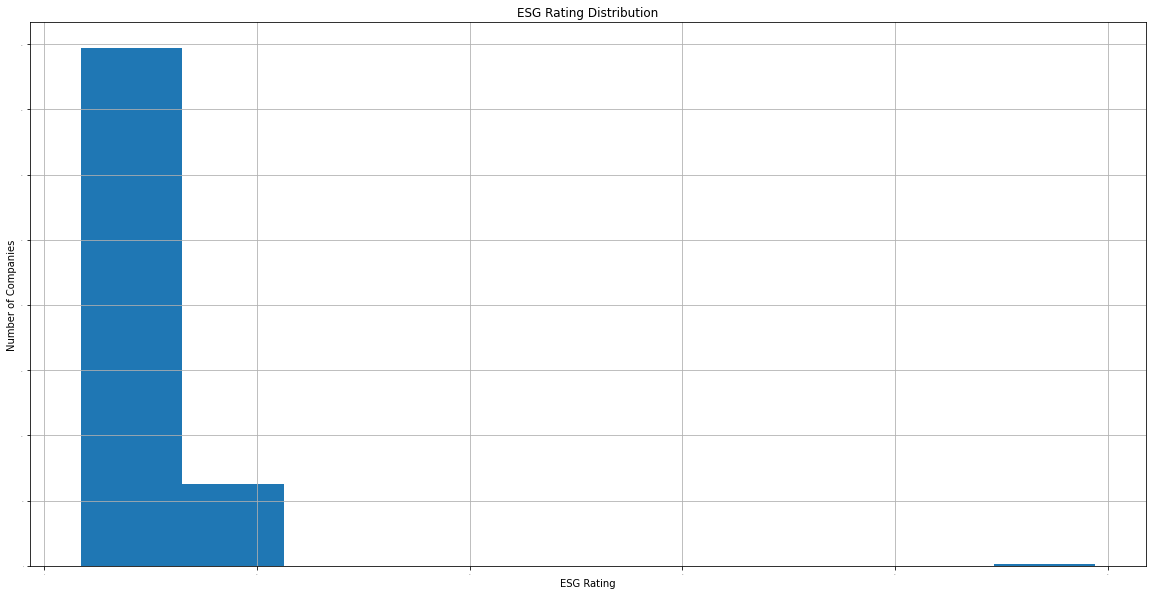

In [109]:
plt.rc('figure', figsize=(20,10))
target.hist(xlabelsize=1, ylabelsize=1)
pyplot.title('ESG Rating Distribution')
pyplot.xlabel('ESG Rating')
pyplot.ylabel('Number of Companies')
pyplot.show()

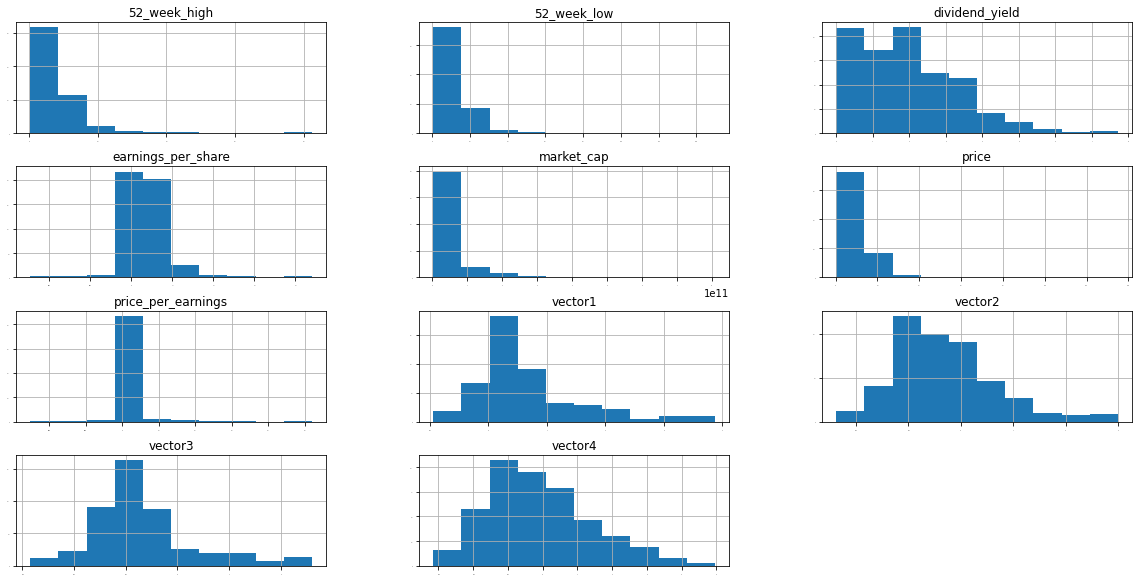

In [110]:
set_printoptions(precision=3)
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

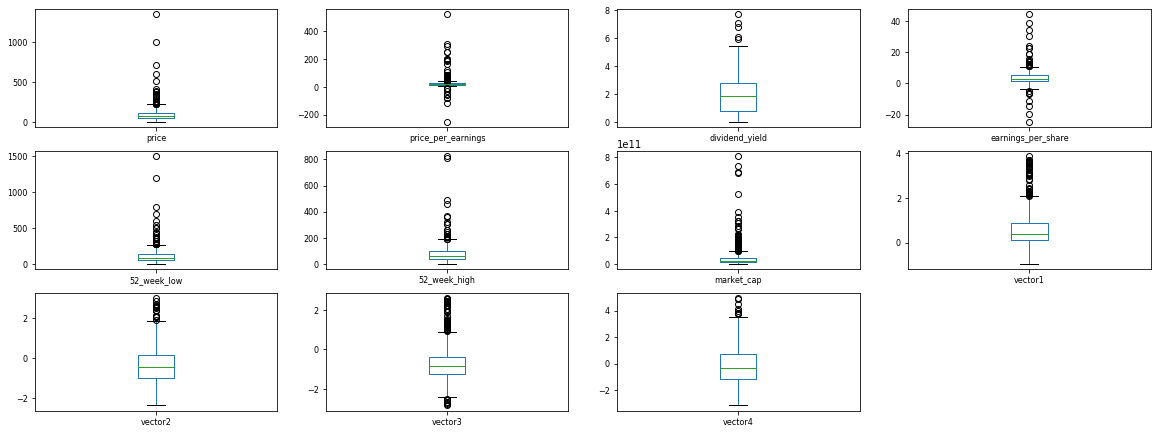

In [115]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

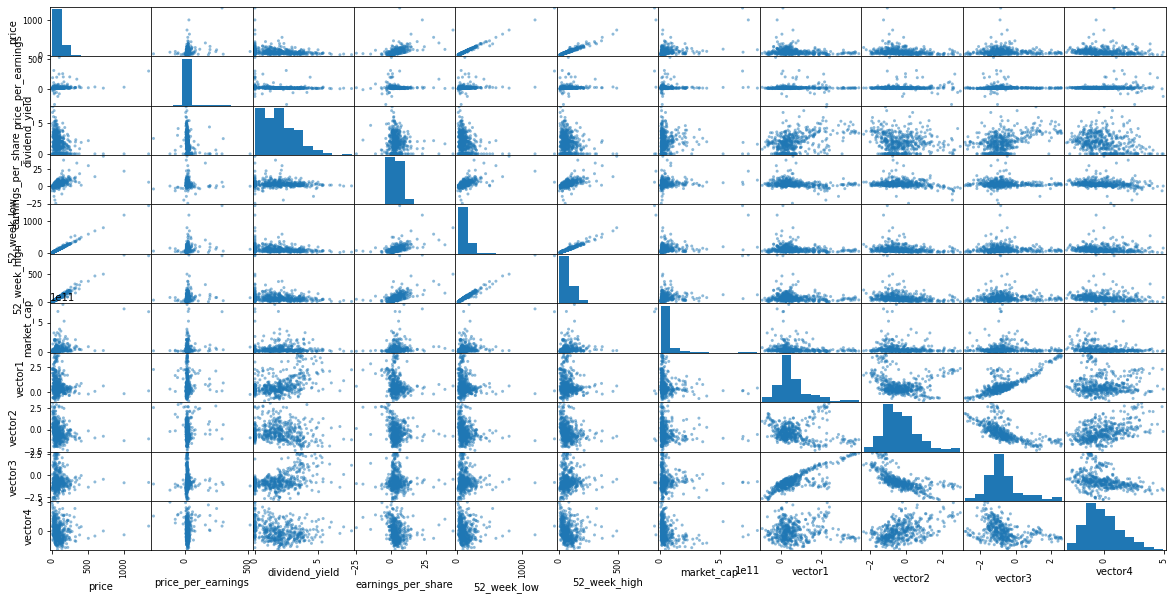

In [116]:
scatter_matrix(dataset)
pyplot.show()

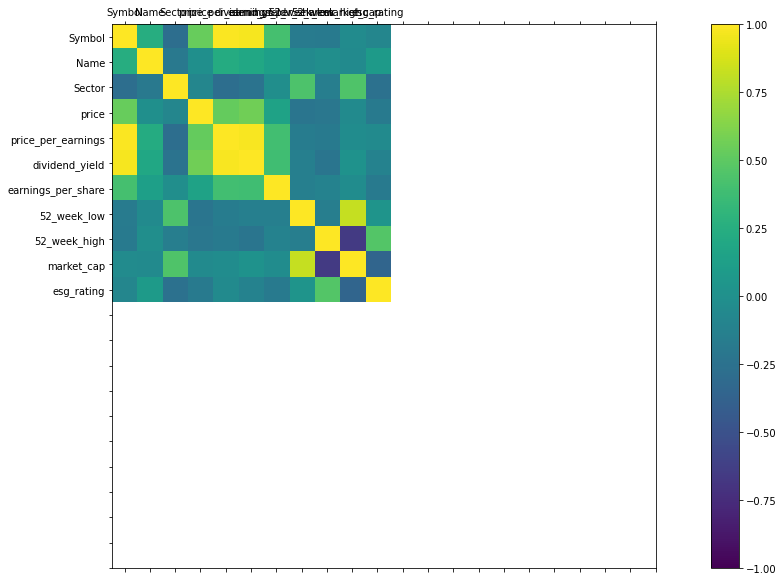

In [114]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

In [118]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:10]
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [159]:
num_folds = 10
seed = 7
#scoring = 'neg_mean_squared_error'
scoring = 'neg_mean_squared_log_error'
#scoring = 'explained_variance'
#scoring = 'r2'

In [160]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [161]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33507.66080274007, tolerance: 6.931780102719037
  model = cd_fast.enet_coordinate_descent(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split

LR: -0.111040 (0.058056)
LASSO: -0.116552 (0.059223)
EN: -0.117781 (0.059258)
KNN: -0.167243 (0.060801)
CART: -0.162871 (0.060819)
SVR: -0.121597 (0.056718)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


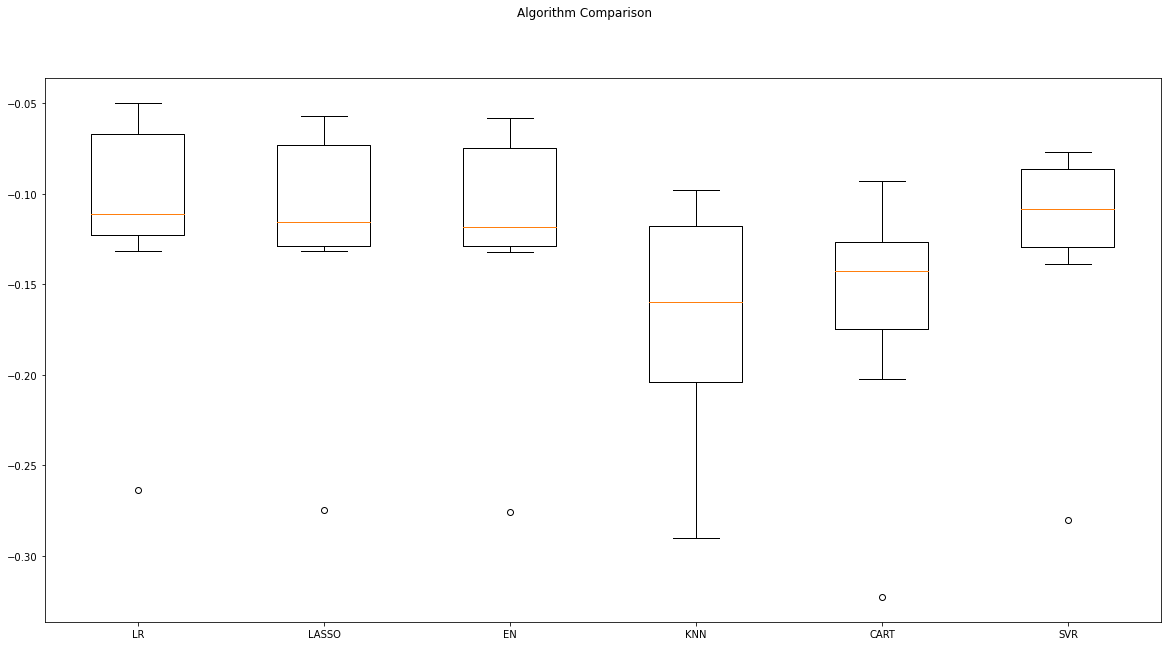

In [162]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [166]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: Futur

ScaledLR: -0.111040 (0.058056)
ScaledLASSO: -0.111712 (0.058559)
ScaledEN: -0.112355 (0.058961)
ScaledKNN: -0.113784 (0.040371)
ScaledCART: -0.180787 (0.056753)
ScaledSVR: -0.104103 (0.050120)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


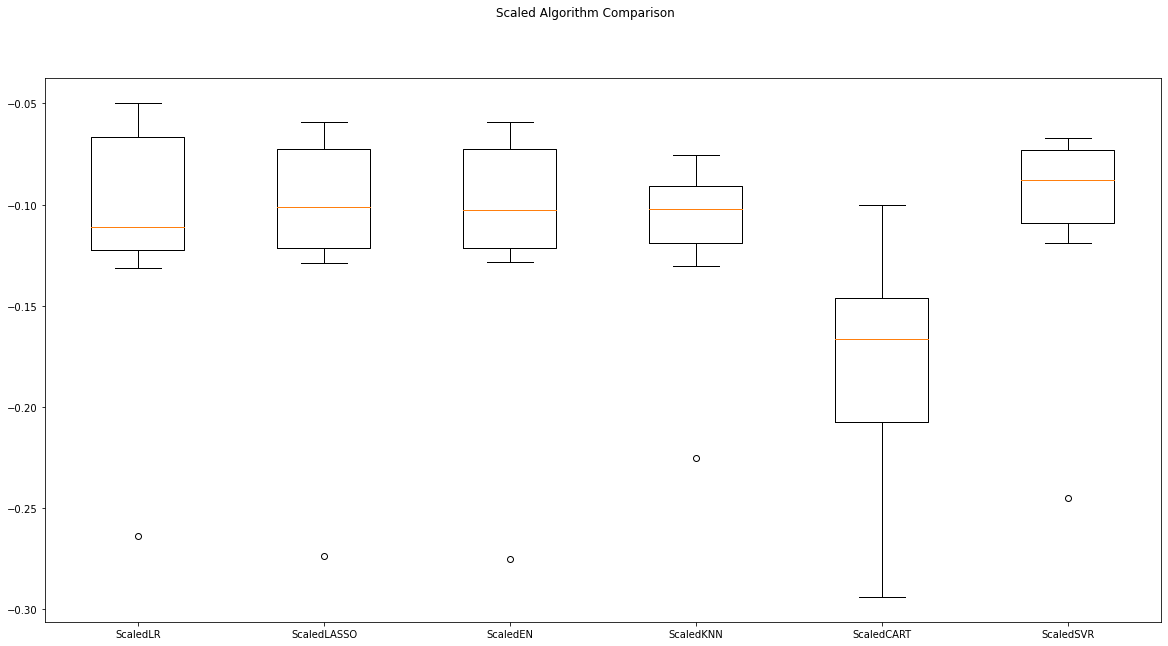

In [167]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [173]:
# SVR Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
#param_grid = dict(n_neighbors=k_values)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
model = SVR(kernel='rbf')
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [174]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.092357 using {'C': 10, 'gamma': 0.1}
-0.119513 (0.055379) with: {'C': 0.001, 'gamma': 0.001}
-0.119498 (0.055383) with: {'C': 0.001, 'gamma': 0.01}
-0.119453 (0.055370) with: {'C': 0.001, 'gamma': 0.1}
-0.119491 (0.055365) with: {'C': 0.001, 'gamma': 1}
-0.119494 (0.055385) with: {'C': 0.01, 'gamma': 0.001}
-0.119346 (0.055429) with: {'C': 0.01, 'gamma': 0.01}
-0.118912 (0.055289) with: {'C': 0.01, 'gamma': 0.1}
-0.119274 (0.055238) with: {'C': 0.01, 'gamma': 1}
-0.119298 (0.055444) with: {'C': 0.1, 'gamma': 0.001}
-0.117942 (0.055836) with: {'C': 0.1, 'gamma': 0.01}
-0.114793 (0.054452) with: {'C': 0.1, 'gamma': 0.1}
-0.117295 (0.054305) with: {'C': 0.1, 'gamma': 1}
-0.117522 (0.055951) with: {'C': 1, 'gamma': 0.001}
-0.110369 (0.057267) with: {'C': 1, 'gamma': 0.01}
-0.104121 (0.049956) with: {'C': 1, 'gamma': 0.1}
-0.108222 (0.048204) with: {'C': 1, 'gamma': 1}
-0.109008 (0.057217) with: {'C': 10, 'gamma': 0.001}
-0.102473 (0.051423) with: {'C': 10, 'gamma': 0.01}
-0.092357

In [175]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
ensembles.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledAB: -0.107129 (0.054041)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledGBM: -0.107066 (0.052519)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledRF: -0.103165 (0.052295)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledET: -0.108243 (0.045331)
ScaledSVR: -0.104103 (0.050120)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


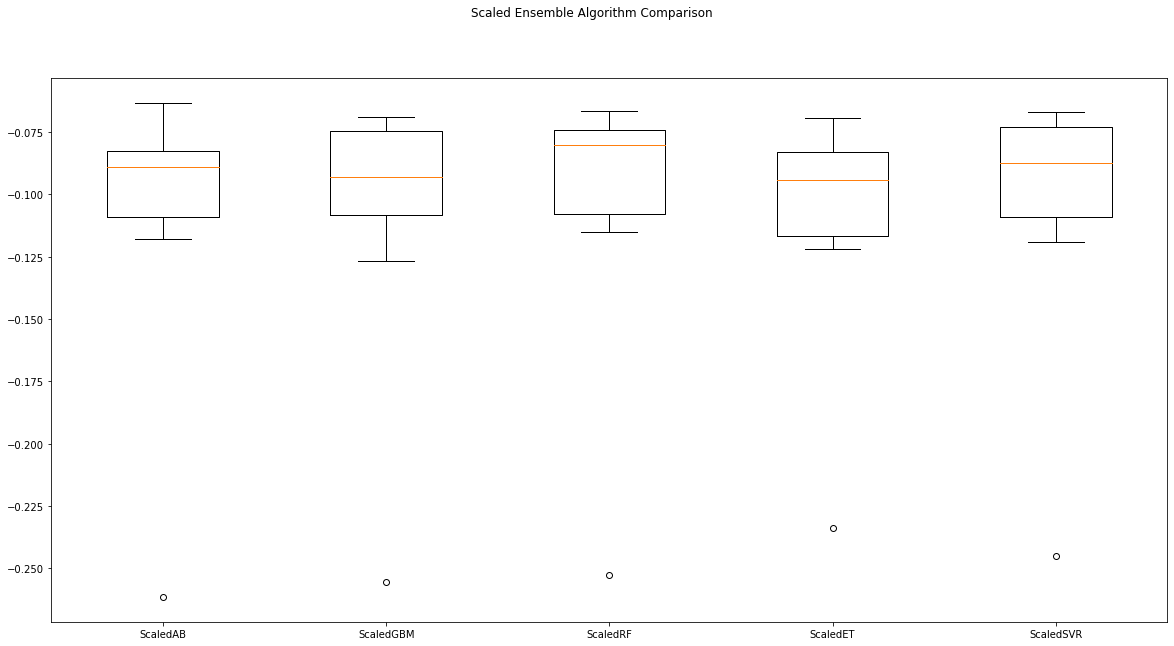

In [176]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [177]:
# Tune scaled RandomForestRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [178]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.100306 using {'n_estimators': 100}
-0.102222 (0.054755) with: {'n_estimators': 50}
-0.100306 (0.053724) with: {'n_estimators': 100}
-0.101114 (0.053703) with: {'n_estimators': 150}
-0.101682 (0.053627) with: {'n_estimators': 200}
-0.102287 (0.054167) with: {'n_estimators': 250}
-0.102085 (0.054275) with: {'n_estimators': 300}
-0.102527 (0.054117) with: {'n_estimators': 350}
-0.102881 (0.054281) with: {'n_estimators': 400}


In [182]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

RandomForestRegressor(random_state=7)

In [189]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))

0.11354880203330744


In [191]:
predictions

array([22.353, 22.538, 21.691, 21.145, 19.02 , 26.681, 21.087, 21.356,
       18.68 , 26.312, 23.69 , 17.573, 20.203, 22.964, 22.686, 21.835,
       26.423, 23.812, 23.406, 25.267, 30.699, 28.469, 29.853, 19.629,
       21.222, 22.999, 24.091, 24.343, 22.351, 41.726, 28.498, 24.609,
       21.932, 22.708, 20.123, 21.848, 21.03 , 21.787, 17.599, 30.618,
       21.606, 35.682, 18.948, 18.375, 20.652, 22.709, 21.136, 20.683,
       23.178, 28.361, 16.1  , 19.489, 19.238, 22.2  , 22.771, 23.212,
       20.978, 25.501, 21.324, 28.21 , 22.629, 29.336, 24.61 , 19.749,
       19.217, 18.707, 21.677, 17.909, 31.621, 22.269, 23.992, 63.452,
       22.289, 20.431, 17.946, 23.217, 24.841, 29.182, 20.343, 66.409,
       31.279, 22.835, 19.578, 25.538, 20.793, 24.339, 26.511, 22.784,
       19.013, 22.569, 20.935, 20.559, 18.991])